In [3]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt

#Url acerca Feature Scaling    https://www.cnblogs.com/quinn-yann/p/9808247.html

In [32]:
#np.save("noisy_data",y_output)

In [33]:
#df=pd.DataFrame(y_output)
#df.to_csv("noisy_data.csv")

Ahora intentaré hacer feature scalen al ... feature x no al y

In [46]:
m = 1000
x = range(m)
y_output = x+ 25*np.random.rayleigh(1,m) -250

zipped_data=zip(x,y_output)

df = pd.DataFrame(zipped_data,columns=["x","y"])

mean = df["x"].mean()
std  = df["x"].std()

df["x_st"]=df["y"].apply(lambda _ : (_ - mean)/std)

zipped=list(zip(df["x_st"],df["y"]))

In [148]:
weight = 0
bias = 0
alpha = 0.01

itr = 0

def Costo(zipped,weight,bias):
    return sum([(y-weight*x-bias)**2 for x, y in zipped])*(1/(2*m))

def deltaW (zipped,weight,bias,m) :
    return (1/m)*sum([ -y*x  + weight*x*x + bias*x for  x,y  in   zipped ])
 

def deltaB (zipped,weight,bias,m) :
    return (1/m)*sum([ - y   + weight*x   + bias   for  x,y  in   zipped ])

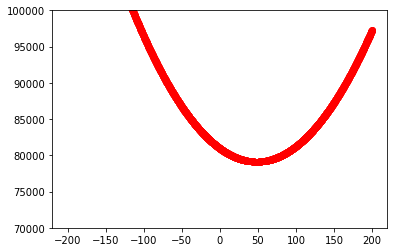

In [145]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

bias = 0

space = np.linspace(-200,200,2200)

y_plot_0 = [Costo(zipped,i,bias) for i in space]

plt.ylim(70000, 100000)
#plt.xlim(-0.01,0.01)

ax1.scatter(space,y_plot_0,color='r')


plt.show()


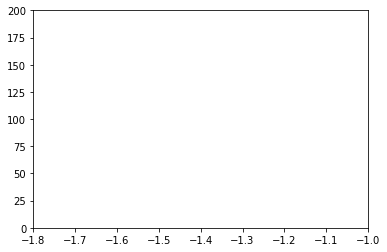

Iteración=200 , Weight= 163.51267158468514 , bias= 316.85388236508095 and cost = 11676.161616289575


In [150]:
for e in range(100):

    temp0 = weight - alpha*deltaW(zipped,weight,bias,m)
    temp1 = bias   - alpha*deltaB(zipped,weight,bias,m)

    weight = temp0
    bias   = temp1

    cost = Costo(zipped,weight,bias)

    itr = itr +1


fig = plt.figure()
ax1 = fig.add_subplot(111)

plt.ylim(-0, 200)
plt.xlim(-1.8, -1)


ax1.scatter(df["x_st"],df["y"],color='b')
ax1.scatter(df["x_st"],line_candidate,color='r')

line_candidate = df["x_st"]*weight + bias # This is some line
plt.show()

print(f"Iteración={itr} , Weight= {weight} , bias= {bias} and cost = {cost}")
